# Controlling the logistic map.
The logistic map is given
$$
 x_{n+1}=r x (1-x)
$$

Remember that the fixed points for this iteration is 
$ x^*=0$, stable for $r<1$ and unstable for $r>1$, and $x^*=1-\frac{1}{r} $, stable $1<r<3$. 

For $r>3$ they are both unstable. But they do exist. 

<font color='blue'>*First objective*:</font> We aim to reach the unstable point as soon as possible. Given a value r and a possible perturbation with max $\delta r$, so that we can have $r\in (r-\delta r,r+\delta r)$. 






Fixed point: 0.7435897435897436


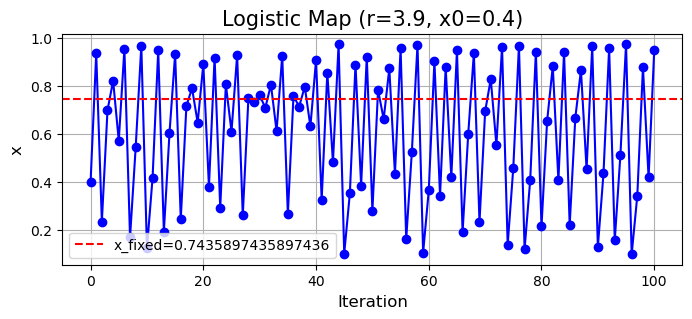

In [110]:
import matplotlib.pyplot as plt
import numpy as np
r=3.9
x0=0.4
dmax=0.02 # delta r max

x_fixed=1-1/r
print(f'Fixed point: {x_fixed}')
# Parameters
iterations = 100
x_values = [x0]

# Generate logistic map values
for _ in range(iterations):
    x_next = r * x_values[-1] * (1 - x_values[-1])
    x_values.append(x_next)

# Plot the logistic map
plt.figure(figsize=(8, 3))
plt.plot(range(iterations + 1), x_values, marker='o', linestyle='-', color='b')
plt.axhline(y=x_fixed, color='r', linestyle='--', label=f'x_fixed={x_fixed}')
plt.legend()
plt.title(f'Logistic Map (r={r}, x0={x0})', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.grid()
plt.show()

Let's iterate with $r=r+\delta r$ and $r=r-\delta r$ until we bracket the fixed point. 

In [80]:
#Bracketing
r_min=r-dmax
r_max=r+dmax
x_values = [x0]
x_1 = r_min * x0 * (1 - x0)
x_2 = r_max * x0 * (1 - x0)
n=1 
print(f'target x_fixed={x_fixed}')
print(f'Initial values: x_1={x_1}, x_2={x_2}')
while not (x_1 < x_fixed < x_2 or x_2 < x_fixed < x_1):
    x_1 = r * x_1 * (1 - x_1)
    x_2 = r * x_2 * (1 - x_2)
    n += 1
    print(f'Iteration {n}: x_1={x_1}, x_2={x_2}')
    
print(f'Bracketing found in {n} iterations')
print(f'x_1={x_1}, x_2={x_2}')


target x_fixed=0.7435897435897436
Initial values: x_1=0.9312, x_2=0.9408
Iteration 2: x_1=0.2498595839999999, x_2=0.2172119040000001
Iteration 3: x_1=0.7309761119050528, x_2=0.6631204817667099
Iteration 4: x_1=0.7669351393439755, x_2=0.8712276628699662
Iteration 5: x_1=0.6971079623953083, x_2=0.4375410870484005
Iteration 6: x_1=0.823478959525442, x_2=0.9597856483523277
Iteration 7: x_1=0.5669093147029161, x_2=0.15052891451999562
Iteration 8: x_1=0.9575402600633459, x_2=0.4986928456123671
Bracketing found in 8 iterations
x_1=0.9575402600633459, x_2=0.4986928456123671


We know that we can hit the target value, and since the equation is continuous on the parameter $r$. 

In [82]:
from scipy.optimize import minimize_scalar

def logistic_evaluation(n, r_w, r, x0):
    x_values = [x0]
    for i in range(n):
        if i == 0:
            x_next = r_w * x_values[-1] * (1 - x_values[-1])
        else:
            x_next = r * x_values[-1] * (1 - x_values[-1])
        x_values.append(x_next)
    return x_values

def cost_function(n, r_w, r, x0, x_fixed):
    x_values = logistic_evaluation(n, r_w, r, x0)
    return abs(x_values[-1] - x_fixed)
# Define the objective function for optimization
def objective_function(r_w):
    return cost_function(n, r_w, r, x0, x_fixed)

# Use a scalar minimization method to find r_w
result = minimize_scalar(objective_function, bounds=(r_min, r_max), method='bounded')

# Extract the optimal r_w
r_w_optimal = result.x
print(f'Optimal r_w: {r_w_optimal} a perturbation of {r - r_w_optimal}')

# Verify the result
x_values_optimal = logistic_evaluation(n, r_w_optimal, r, x0)
print(f'Last value of x_values: {x_values_optimal[-1]} (should be close to x_fixed={x_fixed})')
print(f'error: {abs(x_values_optimal[-1] - x_fixed)}')


Optimal r_w: 3.8943383629257537 a perturbation of 0.005661637074246162
Last value of x_values: 0.7435892829855215 (should be close to x_fixed=0.7435897435897436)
error: 4.606042220967055e-07


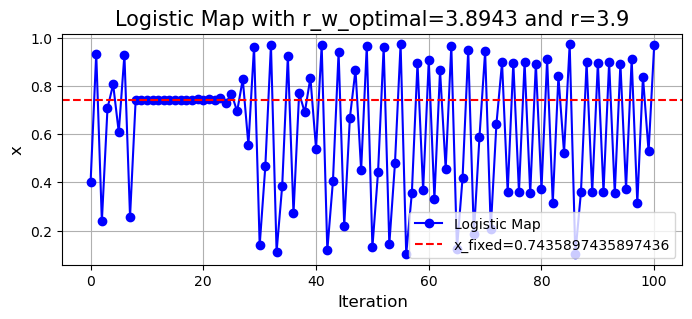

In [81]:
# Generate logistic map values with the first r=r_w_optimal and the rest r
x_values_plot = logistic_evaluation(iterations, r_w_optimal, r, x0)

# Plot the result
plt.figure(figsize=(8, 3))
plt.plot(range(len(x_values_plot)), x_values_plot, marker='o', linestyle='-', color='b', label='Logistic Map')
plt.axhline(y=x_fixed, color='r', linestyle='--', label=f'x_fixed={x_fixed}')
plt.legend()
plt.title(f'Logistic Map with r_w_optimal={r_w_optimal:.4f} and r={r}', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.grid()
plt.show()

<font color='green'> Exercise: </font> Play with the initial value $x_0$ and $r$.

## Stabilization

The fixed point is unstable, as can be seen from the figure above. Let's try to stabilize it by juggling the $r$ parameter.

<font color='blue'>*Second objective*:</font> Keep the system at the unstable fixed point. 

Plot the iteration when starting in the fixed point.

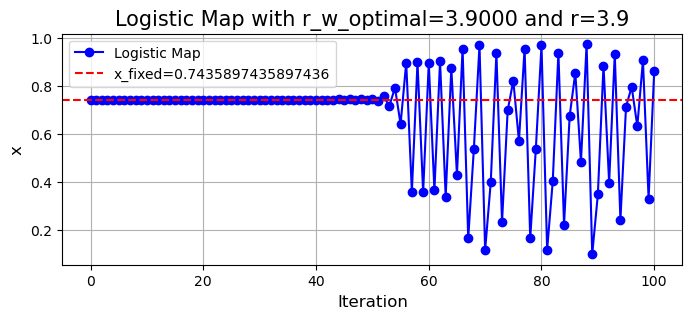

In [83]:
# Generate logistic map values starting in the fixed point.
x_values_plot = logistic_evaluation(iterations, r, r, x_fixed)

# Plot the result
plt.figure(figsize=(8, 3))
plt.plot(range(len(x_values_plot)), x_values_plot, marker='o', linestyle='-', color='b', label='Logistic Map')
plt.axhline(y=x_fixed, color='r', linestyle='--', label=f'x_fixed={x_fixed}')
plt.legend()
plt.title(f'Logistic Map with r_w_optimal={r:.4f} and r={r}', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.grid()
plt.show()

Iteration 52: r=3.8280684474122606, x=0.7575622118147792


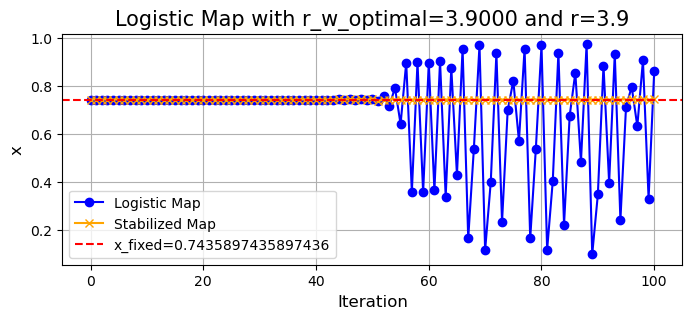

In [93]:
def logistic_stabilization(n, r, x0, x_target, error_tolerance=1e-4):
    x_values = [x0]
    r_use=[r]
    for i in range(n):
        x_trial=r*x_values[-1]*(1-x_values[-1])
        if np.abs(x_trial-x_target)>error_tolerance:
            dfdr=x_values[-1]*(1-x_values[-1])
            r_updated = r - (x_trial - x_target) / dfdr
            print(f'Iteration {i+1}: r={r_updated}, x={x_trial}')
        else:
            r_updated=r 

        x_next = r_updated * x_values[-1] * (1 - x_values[-1])
        
        x_values.append(x_next)
        r_use.append(r_updated)
    return x_values,r_use

# Parameters
iterations = 100
error_tolerance = 1e-2
x_stabilized, r_use = logistic_stabilization(iterations, r, x_fixed, x_fixed, error_tolerance=error_tolerance)
# Plot the result
plt.figure(figsize=(8, 3))
plt.plot(range(len(x_values_plot)), x_values_plot, marker='o', linestyle='-', color='b', label='Logistic Map')
plt.plot(range(len(x_stabilized)), x_stabilized, marker='x', linestyle='-', color='orange', label='Stabilized Map')
plt.axhline(y=x_fixed, color='r', linestyle='--', label=f'x_fixed={x_fixed}')
plt.legend()
plt.title(f'Logistic Map with r_w_optimal={r:.4f} and r={r}', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.grid()
plt.show()


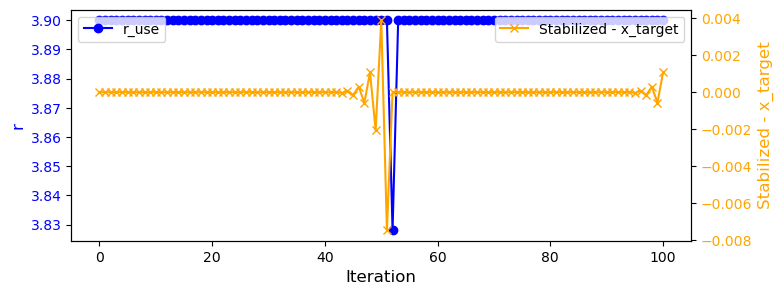

In [94]:
# Plot r_use
fig, ax1 = plt.subplots(figsize=(8, 3))

# Plot r_use on the first y-axis
ax1.plot(range(len(r_use)), r_use, marker='o', linestyle='-', color='b', label='r_use')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('r', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis for stabilized - x_target
ax2 = ax1.twinx()
stabilized_diff = [x - x_fixed for x in x_stabilized]
ax2.plot(range(len(stabilized_diff)), stabilized_diff, marker='x', linestyle='-', color='orange', label='Stabilized - x_target')
ax2.set_ylabel('Stabilized - x_target', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')


<font color='green'>Exercise: </font> Play with the error tolerance. Will we kick the solution more often with less tolerance?

## OGY


This method works with the ergodicity of the system, waiting until we are within a distance from the fixed point and grab it. 

Grab it at iteration 28: r=3.9, x=0.7485706715438799


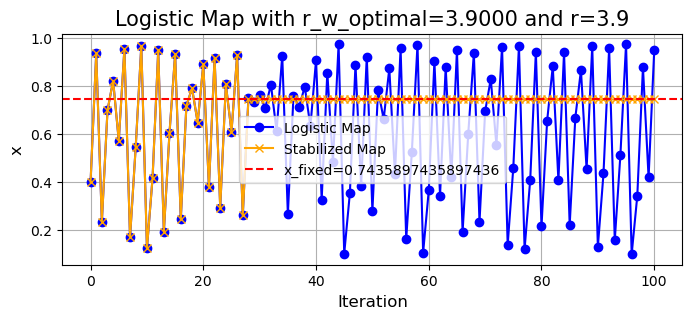

In [111]:
def ogy_grab(x0, r, x_target, rmax, iterations):
    x_values = [x0]
    r_use=[0]
    dfdr=x0*(1-x0)
    dfdx=r*(1-2*x0)
    dxmax=dfdr*rmax/dfdx
    first_grab = True
    for i in range(iterations):
        x_trial = r * x_values[-1] * (1 - x_values[-1])
        if abs(x_trial - x_target) < dxmax:
            if first_grab:
                first_grab = False
                print(f'Grab it at iteration {i+1}: r={r}, x={x_trial}')
            dfdr=x_values[-1]*(1-x_values[-1])
            r_use = r - (x_trial - x_target) / dfdr
        else:
            r_use=r
        x_next = r_use * x_values[-1] * (1 - x_values[-1])
        x_values.append(x_next)

    return x_values

# Use the OGY method to wait for being close to x_target
x_ogy = ogy_grab(x0, r, x_fixed, dmax, iterations)
x_values = logistic_evaluation(iterations, r, r, x0)
plt.figure(figsize=(8, 3))
plt.plot(range(len(x_values)), x_values, marker='o', linestyle='-', color='b', label='Logistic Map')
plt.plot(range(len(x_ogy)), x_ogy, marker='x', linestyle='-', color='orange', label='Stabilized Map')
plt.axhline(y=x_fixed, color='r', linestyle='--', label=f'x_fixed={x_fixed}')
plt.legend()
plt.title(f'Logistic Map with r_w_optimal={r:.4f} and r={r}', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.grid()
plt.show()



<font color='green'>Exercise: </font> Redo the analysis with smaller $\delta r$ tolerance. 

<font color='green'>Exercise: </font> Can you stabilize a period two solution?

# Syncronization

Two systems, one is driving the other. 

$$
\begin{array}{l}
\dot{x}_1 = σ(x_2 − x_1), \\
\dot{x}_2 = r x_1 − x_2 − x_1 x_3, \\ 
\dot{x}_3 = x_1 x_2 − b x_3,
\end{array}
$$
$$
\begin{array}{l}
\dot{y}_2 = - x_1 y_3 + r x_1 − y_2, \\ 
\dot{y}_3 = x_1 y_2 − b y_3,
\end{array}
$$

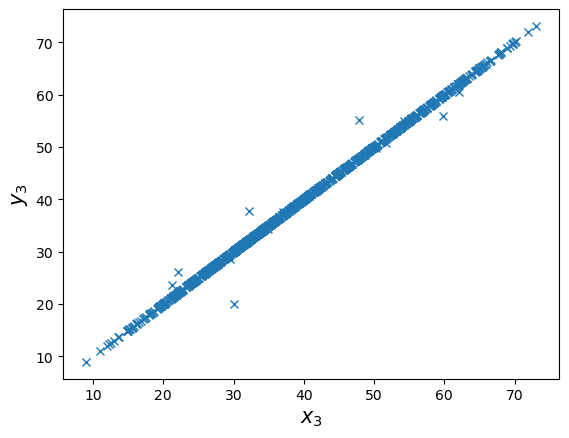

In [100]:
# Program 19c: Synchronization between two Lorenz systems.
# See Figure 19.7(b).

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
sigma = 16
b = 4
r = 45.92
tmax = 100

t = np.arange(0.0, tmax, 0.1)

def two_lorenz_odes(X, t):
    x1, x2, x3, y2, y3 = X
    dx1 = sigma * (x2 - x1)
    dx2 = -x1 * x3 + r*x1 - x2
    dx3 = x1 * x2 - b*x3
    dy2 = -x1 * y3 + r*x1 - y2
    dy3 = x1 * y2 - b*y3
    return (dx1, dx2, dx3, dy2, dy3)

y0 = [15, 20, 30, 10, 20]
X = odeint(two_lorenz_odes, y0, t, rtol=1e-6)
x1, x2, x3, y2, y3 = X.T  # unpack columns

plt.figure(1)

plt.plot(x3, y3,'x')
plt.xlabel(r'$x_3$', fontsize=15)
plt.ylabel(r'$y_3$', fontsize=15)
plt.show()


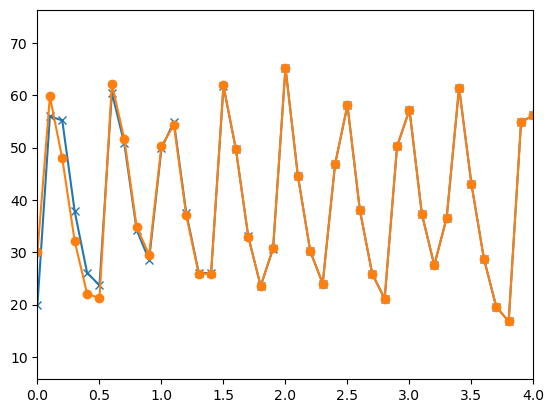

In [101]:
plt.figure(1)

plt.plot(t, y3,'-x')
plt.plot(t, x3,'-o')
plt.xlim(0, 4)
plt.show()


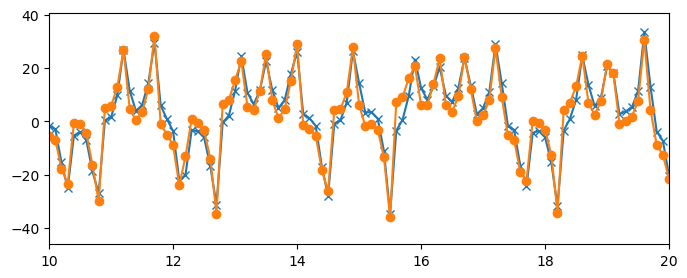

In [109]:
from scipy.interpolate import interp1d

def driver_lorenz_odes(X, t):
    x1, x2, x3= X
    dx1 = sigma * (x2 - x1)
    dx2 = -x1 * x3 + r*x1 - x2
    dx3 = x1 * x2 - b*x3
    
    return (dx1, dx2, dx3)



driver=odeint(driver_lorenz_odes, y0[:3], t, rtol=1e-6)
x1, x2, x3 = driver.T  # unpack columns 

# Create an interpolation function for x3
x1_interpolator = interp1d(t, x1, kind='linear', fill_value="extrapolate")

# Modify reciever_lorenz_ode to use interpolated x3
def reciever_lorenz_ode(y, t):
    y2, y3 = y
    x3_at_t = x1_interpolator(t)  # Interpolate x3 at time t
    dy2 = -x3_at_t * y3 + r * x3_at_t - y2
    dy3 = x3_at_t * y2 - b * y3
    return (dy2, dy3)

reciever=odeint(reciever_lorenz_ode, y0[3:], t, rtol=1e-6)
y2,y3=reciever.T

plt.figure(figsize=(8, 3)) 
plt.plot(t, y2,'-x')
plt.plot(t, x2,'-o')

plt.xlim(10, 20)
plt.show()
